In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

from analysis_toolkit import setup_latex, util, plots
from analysis_toolkit import definitions as defs

summary = pd.read_csv('summary.csv', dtype=defs.COLUMNS)
setup_latex()

Text(0.5, 0, 'Adjusted Rand Index')

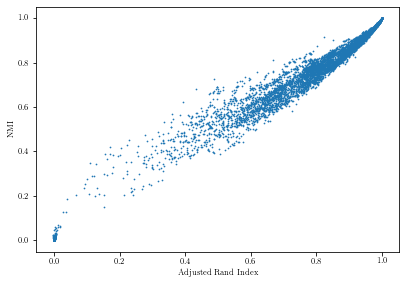

In [2]:
fig, ax = plt.subplots(1, 1, figsize=(6.5, 4.5))

ax.scatter(summary['rand'], summary['nmi'], marker='.', s=2)
ax.set_ylabel('NMI')
ax.set_xlabel('Adjusted Rand Index')

In [122]:
import bmcc

BASE = 'd=8,p=1920,k=3,r=0.8/794c1531-6a0f-4d79-a89c-e4c004425d21.npz'

dataset = bmcc.GaussianMixture('./phase_1/data/' + BASE, load=True)
hist = np.load('./phase_1/results/dpm_eb_gibbs/' + BASE)['hist']

res = bmcc.LstsqResult(dataset.data, hist, burn_in=int(hist.shape[0] / 2))
res.evaluate(dataset.assignments, oracle=dataset.oracle, oracle_matrix=dataset.oracle_matrix)

/home/tianshu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.


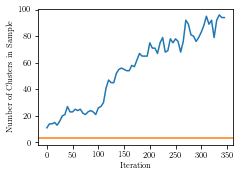

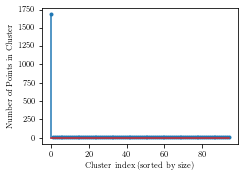

In [154]:
fig, ax = plt.subplots(1, 1, figsize=(3.5, 2.5))
ax.plot(np.arange(hist.shape[0]) * 5, [np.max(x) for x in hist])
ax.axhline(3, color='C1')
ax.set_xlabel('Iteration')
ax.set_ylabel('Number of Clusters in Sample')
fig.savefig('./plots/p1_explode_example/num_clusters.pdf', bbox_inches='tight')

fig, ax = plt.subplots(1, 1, figsize=(3.5, 2.5))
clusters, sizes = np.unique(hist[-1], return_counts=True)
ax.stem(np.sort(sizes)[::-1], markerfmt='.')
ax.set_xlabel('Cluster index (sorted by size)')
ax.set_ylabel('Number of Points in Cluster')
fig.savefig('./plots/p1_explode_example/num_points.pdf', bbox_inches='tight')



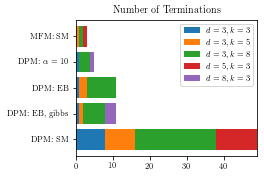

In [121]:
METHODS = {
    'dpm_sm': "DPM: SM",
    'dpm_eb_gibbs': "DPM: EB, gibbs",
    'dpm_eb': "DPM: EB",
    'dpm_big_alpha': r"DPM: $\alpha=10$",
    'mfm_sm': "MFM: SM",
}


fig, ax = plt.subplots(1, 1, figsize=(3.25, 2.5))
df = summary[summary['iterations'] < 1000]
methods = list(df['method'].drop_duplicates())

bottom = np.zeros(len(METHODS))

for t in defs.TESTS_P1:
    df_f = util.filter(df, **t)
    
    next_d = [len(df_f[df_f['method'] == m]) for m in METHODS]
    ax.barh(np.arange(len(METHODS)), next_d, left=bottom, label="$d={}, k={}$".format(t['d'], t['k']))
    bottom += np.array(next_d)

ax.set_yticks(np.arange(len(methods)))
ax.set_yticklabels([v for k, v in METHODS.items()])
ax.legend()
ax.set_title('Number of Terminations')

plt.savefig('./plots/failures_bar.pdf', bbox_inches='tight')


In [119]:
import bmcc

BASE = 'd=3,p=720,k=3,r=0.8/a781e22f-73ba-416a-94c5-9fae4a294c67.npz'
# BASE = 'd=3,p=720,k=3,r=0.8/bcdf2afe-d5ea-409b-b762-298d878048fb.npz'

dataset = bmcc.GaussianMixture('./phase_1/data/' + BASE, load=True)
hist = np.load('./phase_1/results/mfm_gibbs/' + BASE)['hist']

res = bmcc.LstsqResult(dataset.data, hist, burn_in=300)
res.evaluate(dataset.assignments, oracle=dataset.oracle, oracle_matrix=dataset.oracle_matrix)

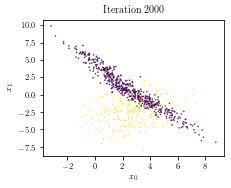

In [120]:
fig, ax = plt.subplots(1, 1, figsize=(3.25, 2.5))
ax.scatter(dataset.data[:, 0], dataset.data[:, 1], c=hist[500], marker='.', s=1)
ax.set_xlabel('$x_0$')
ax.set_ylabel('$x_1$')
ax.set_title('Iteration 2000')
plt.savefig('./plots/p1_gibbs_stuck_example/it_2.pdf', bbox_inches='tight')

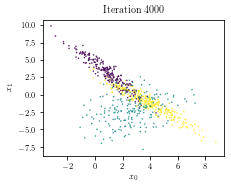

In [121]:
fig, ax = plt.subplots(1, 1, figsize=(3.25, 2.5))
ax.scatter(dataset.data[:, 0], dataset.data[:, 1], c=hist[800], marker='.', s=1)
ax.set_xlabel('$x_0$')
ax.set_ylabel('$x_1$')
ax.set_title('Iteration 4000')
plt.savefig('./plots/p1_gibbs_stuck_example/it_3.pdf', bbox_inches='tight')

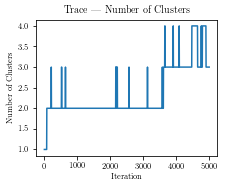

In [122]:
fig, ax = plt.subplots(1, 1, figsize=(3.25, 2.5))

hist = np.load('./phase_1/results/mfm_gibbs/' + BASE)['hist']
ax.plot(np.arange(hist.shape[0]) * 5, [np.max(x) + 1 for x in hist])
ax.set_ylabel('Number of Clusters')
ax.set_xlabel('Iteration')
ax.set_title('Trace | Number of Clusters')
plt.savefig('./plots/p1_gibbs_stuck_example/trace.pdf', bbox_inches='tight')

In [123]:
nt(import bmcc

BASE = 'd=3,p=720,k=3,r=0.8/b72d47f4-00a0-4d2d-8ba5-ac66ad370847.npz'

dataset = bmcc.GaussianMixture('./phase_1/data/' + BASE, load=True)
hist = np.load('./phase_1/results/mfm_sm/' + BASE)['hist']

res = bmcc.LstsqResult(dataset.data, hist, burn_in=200)
res.evaluate(dataset.assignments, oracle=dataset.oracle, oracle_matrix=dataset.oracle_matrix)

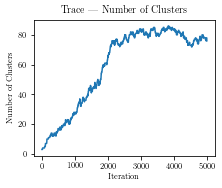

In [125]:
fig, ax = plt.subplots(1, 1, figsize=(3.25, 2.5))

ax.plot(np.arange(hist.shape[0]) * 5, [np.max(x) + 1 for x in hist])
ax.set_ylabel('Number of Clusters')
ax.set_xlabel('Iteration')
ax.set_title('Trace | Number of Clusters')
plt.savefig('./plots/p1_sm_explode/trace.pdf', bbox_inches='tight')

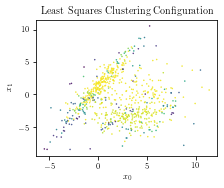

In [126]:
fig, ax = plt.subplots(1, 1, figsize=(3.25, 2.5))
ax.scatter(dataset.data[:, 0], dataset.data[:, 1], c=res.best, marker='.', s=1)
ax.set_xlabel('$x_0$')
ax.set_ylabel('$x_1$')
ax.set_title('Least Squares Clustering Configuration')
plt.savefig('./plots/p1_sm_explode/clustering.pdf', bbox_inches='tight')

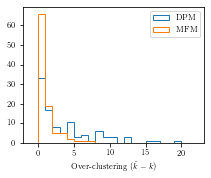

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(3.25, 2.5))

df = util.filter(summary, method='dpm_hybrid', k=3, d=3)
ax.hist(
    df['num_clusters'] - df['k'], bins=np.arange(-1, 23),
    fill=False, histtype='step', color='C0',
    label='DPM')

df2 = util.filter(summary, method='mfm_hybrid', k=3, d=3)
ax.hist(
    df2['num_clusters'] - df2['k'], bins=np.arange(-1, 23),
    fill=False, histtype='step', color='C1',
    label='MFM')
ax.set_xlabel(r'Over-clustering ($\hat{k} - k$)')
ax.legend()

fig.savefig('plots/mfm_vs_dpm_oc.pdf', bbox_inches='tight')


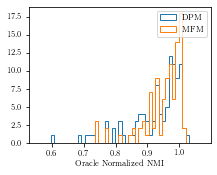

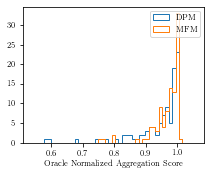

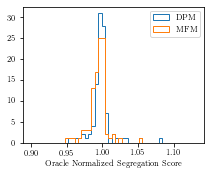

In [48]:
for key, desc in [('nmi', 'NMI'), ('aggregation', 'Aggregation Score'), ('segregation', 'Segregation Score')]:

    fig, ax = plt.subplots(1, 1, figsize=(3.25, 2.5))

    dpm_data = util.oracle_ratio(summary, method='dpm_hybrid', key=key, d=3, k=3)
    mfm_data = util.oracle_ratio(summary, method='mfm_hybrid', key=key, d=3, k=3)
    
    left = min(min(dpm_data), min(mfm_data)) - 0.05
    right = max(max(dpm_data), max(mfm_data)) + 0.05
    
    ax.hist(
        dpm_data, bins=np.linspace(left, right),
        fill=False, histtype='step', color='C0',
        label='DPM')

    ax.hist(
        mfm_data, bins=np.linspace(left, right),
        fill=False, histtype='step', color='C1',
        label='MFM')
    ax.legend()

    ax.set_xlabel('Oracle Normalized ' + desc)
    fig.savefig('plots/mfm_vs_dpm_{}.pdf'.format(key), bbox_inches='tight')